### Load data

In [1]:
import pandas as pd
predictions = pd.read_csv("./data/predictions_2.csv")
predictions.head()

,label,predGbt,predReg,predReg_up
0,0,0.017032,0.096103,0.254430
1,0,0.016458,0.085870,0.331462
2,0,0.007234,0.023384,0.157751
3,0,0.009813,0.012534,0.361091
4,0,0.039389,0.004365,0.554634


### Calibration error

In [2]:
import math
def calibrationError(predictions, modelName, bucketSize = 100):
    count, sumPrediction, sumLabel = 0, 0, 0
    bucketFraudRate = []
    bucketPrediction = []
    bucketErrors = []
    for index, row in predictions.sort_values(by=[modelName]).iterrows():
        sumLabel = sumLabel + row["label"]
        sumPrediction = sumPrediction + row[modelName]
        count = count + 1
        if(count == bucketSize):
            predMean = sumPrediction / float(bucketSize)
            fraudRate = sumLabel / float(bucketSize)
            bucketFraudRate.append(fraudRate)
            bucketPrediction.append(predMean)
            bucketErrors.append(math.sqrt((predMean-fraudRate)*(predMean-fraudRate)))
            count, sumPrediction, sumLabel = 0, 0, 0

    return (bucketFraudRate, bucketPrediction, sum(bucketErrors) / float(len(bucketErrors)))

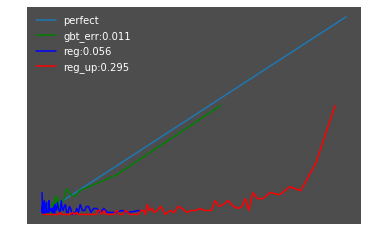

In [3]:
fraudRate_gbt, scores_gbt, err_gbt = calibrationError(predictions, "predGbt")
fraudRate_reg, scores_reg, err_reg = calibrationError(predictions, "predReg")
fraudRate_regup, scores_regup, err_regup = calibrationError(predictions, "predReg_up")
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 1], [0, 1], label = "perfect")
plt.plot(scores_gbt, fraudRate_gbt, color = 'g', label = "gbt_err:{:.3f}".format(err_gbt))
plt.plot(scores_reg, fraudRate_reg, color = 'b', label = "reg:{:.3f}".format(err_reg))
plt.plot(scores_regup, fraudRate_regup, color = 'r', label = "reg_up:{:.3f}".format(err_regup))
plt.legend()
plt.grid()
plt.show()

### Calibration algorithm

In [4]:
def trainCalibration(predictions, modelName, bucketSize = 100):
    count, sumLabel = 0, 0
    buckets = []
    for index, row in predictions.sort_values(by=[modelName]).iterrows():
        sumLabel = sumLabel + row["label"]
        count = count + 1
        if(count == bucketSize):
            fraudRate = sumLabel / float(bucketSize)
            buckets.append((row[modelName], fraudRate))
            count, sumLabel = 0, 0
    
    buckets.append((1,1))
    return buckets

In [5]:
def getCalibratedProb(p, calibBuckets):
    i = 0
    final_p = 0
    while(p > calibBuckets[i][0]):
        final_p = calibBuckets[i][1]
        i = i+1
    return final_p

In [6]:
predictions_train = pd.read_csv("./data/predictions_train_2.csv")

In [11]:
calibGbt = trainCalibration(predictions_train, "predGbt")
predictions["calibGbt"] = predictions["predGbt"].map(lambda x: getCalibratedProb(x, calibGbt))
#calibrationError(predictions, "calibGbt")[2]))
calibrationError(predictions, "calibGbt")[2]

0.01032580645161291

In [15]:
calibReg = trainCalibration(predictions_train, "predReg")
predictions["calibReg"] = predictions["predReg"].map(lambda x: getCalibratedProb(x, calibReg))
calibrationError(predictions, "calibReg")[2]

0.018796774193548367

In [16]:
calibReg_up = trainCalibration(predictions_train, "predReg_up")
predictions["calibReg_up"] = predictions["predReg_up"].map(lambda x: getCalibratedProb(x, calibReg_up))
calibrationError(predictions, "calibReg_up")[2]

0.01168709677419354

In [17]:
calibReg_up

[(0.002112420415297998, 0.0),
 (0.004001479055045406, 0.0),
 (0.005558998241582638, 0.0),
 (0.006713781677684127, 0.0),
 (0.008231549085465204, 0.0),
 (0.009893920967268944, 0.0),
 (0.01164930822278101, 0.0),
 (0.013121890721469593, 0.0),
 (0.014719200875518243, 0.0),
 (0.016313450007670174, 0.0),
 (0.018115941601878016, 0.0),
 (0.019797982221341985, 0.0),
 (0.021407254343571217, 0.0),
 (0.02307940361497871, 0.0),
 (0.024875531655619367, 0.0),
 (0.02652837850306561, 0.0),
 (0.028067931070809925, 0.0),
 (0.029933815777855182, 0.0),
 (0.031345496793207486, 0.0),
 (0.032898754650485036, 0.0),
 (0.034724529934127404, 0.0),
 (0.036479052552262935, 0.0),
 (0.03823121987813629, 0.0),
 (0.040165887015225145, 0.0),
 (0.042405907410741316, 0.0),
 (0.04439609351486546, 0.0),
 (0.04667964699657385, 0.0),
 (0.049233867242590816, 0.0),
 (0.05126637103787099, 0.0),
 (0.05346648066968997, 0.0),
 (0.0553831473025933, 0.01),
 (0.057526240358337186, 0.0),
 (0.05952261015551789, 0.0),
 (0.0617290004258929